Import libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import seaborn as sns

Function definition: Black-Scholes formula

In [2]:
def blackScholesCallDiv(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    return call

Function definition: Determine profit per share 

In [3]:
def callProfit(K, callPrice, expiry):
    callPrice = expiry - K
    if expiry >= K:
        profit = expiry - (K + call)
    else:
        profit = -1 * call
    return profit

Define ticker of interest

In [4]:
ticker = 'V'

Load stock data

In [5]:
tickerFile = ticker + '.csv'
data = pd.read_csv(tickerFile, parse_dates=['Date'])
data = data.sort_values(by='Date')
data.set_index('Date', inplace=True)

close_prices = data['Adj Close']
returns = data['Adj Close'].pct_change().dropna()

Define Black-Scholes constants

In [6]:
S = data['Adj Close'].iloc[-1]  # spot (current) price
K = 280  # strike price
T = 3/12  # time to maturity (years)
r = 0.0152  # risk-free interest rate, annualized
sigma = np.std(returns) * np.sqrt(252)  # volatility of underlying asset, annualize

Set arrays of strike prices and possible expiry prices

In [7]:
strikeArray = np.arange(np.around(S) - 10, np.around(S) + 10, 2)
expiryArray = np.arange(np.around(S) - 8, np.around(S) + 8, 2) 

Initialize profit matrix

In [8]:
profitMat = np.zeros([len(strikeArray), len(expiryArray)])

Populate profit matrix using the Black-Scholes model

In [9]:
for i in range(0, len(strikeArray)):
    for j in range(0, len(expiryArray)):
        K = strikeArray[i]
        expiry = expiryArray[j]
        call = blackScholesCallDiv(S, K, T, r, sigma)
        profit = callProfit(K, call, expiry)
        profitMat[i, j] = profit

Plot profit matrix

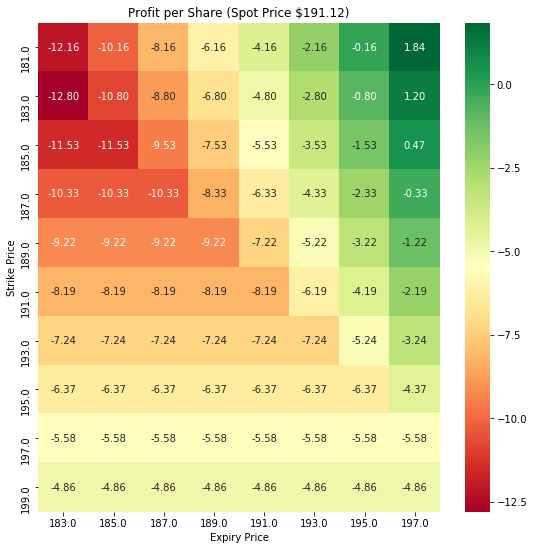

In [10]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(
    data=profitMat,
    xticklabels=expiryArray,
    yticklabels=strikeArray,
    cmap='RdYlGn',
    annot=True,
    fmt='.2f'
    )
plt.title('Profit per Share (Spot Price $%0.2f)' % S)
plt.xlabel('Expiry Price')
plt.ylabel('Strike Price')
plt.show()